In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from heat_map import heatmap, annotate_heatmap
import pathlib

In [18]:
fpath = pathlib.Path(r"\\14.32.167.236\기술혁신팀$\05-7. 장비개발\카메라실험\20190529 광학산포테스트\렌즈사용 100회\DSP_datasheet_20190530_084953\렌즈사용 100회_59fdc04 -  Quantitation Amplification Results.xlsx")

In [22]:
dye_li = ['FAM', 'HEX', 'Cal Red 610', 'Quasar 670', 'Quasar 705']

In [23]:
f_dic = pd.read_excel(fpath, sheet_name=None, index_col=0)
f_dic['FAM'].head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4,Unnamed: 17,Zone 1,Zone 2
0,1274786,1464631,1493571,1260799,1545156,1698384,1661859,1602422,1334129,1457686,1445365,1406742,697050,1034507,1093525,968398,NaN,NaN,NaN
1,1237360,1417239,1450937,1227501,1560474,1722191,1685128,1611686,1298939,1418110,1401069,1370121,607446,1019030,1082090,951544,NaN,NaN,NaN
10,1263767,1442350,1477893,1259699,1561390,1732671,1683901,1615822,1329434,1447143,1438303,1403758,606633,1032526,1088244,968939,NaN,NaN,NaN
11,1275609,1460672,1487198,1264514,1571493,1735525,1705869,1625881,1323830,1442292,1425608,1387950,624378,1037814,1109880,981913,NaN,NaN,NaN
12,1271548,1455370,1489971,1265483,1551299,1715506,1679055,1606302,1335048,1449465,1435242,1403604,597731,1015251,1076012,964656,NaN,NaN,NaN


In [29]:
df = f_dic['FAM'].sort_index().dropna(axis=1)
df.head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4
0,1274786,1464631,1493571,1260799,1545156,1698384,1661859,1602422,1334129,1457686,1445365,1406742,697050,1034507,1093525,968398
1,1237360,1417239,1450937,1227501,1560474,1722191,1685128,1611686,1298939,1418110,1401069,1370121,607446,1019030,1082090,951544
2,1349458,1532306,1560944,1348498,1631405,1810600,1765168,1707326,1402787,1524035,1512879,1484463,723942,1100718,1162343,1047328
3,1261943,1449532,1476689,1247531,1551773,1726426,1679166,1604760,1333012,1442798,1431284,1393788,598146,1016285,1076905,955522
4,1255810,1434816,1465265,1242513,1565761,1725972,1679801,1614005,1315830,1423212,1407925,1381132,621829,1035232,1098849,968686


In [30]:
df.mean()

A1    1280548.12
A2    1459708.42
A3    1490013.56
A4    1268400.26
B1    1565011.51
B2    1731492.13
B3    1692644.98
B4    1623391.67
C1    1333434.16
C2    1446922.23
C3    1435519.59
C4    1403422.36
D1     626489.91
D2    1040259.16
D3    1101729.46
D4     977577.03
dtype: float64

In [39]:
df.mean()['A1']

1280548.12

In [31]:
row_li = list('ABCD')
col_li = list(range(1, 5))

In [38]:
for i in range(5):
    print(divmod(i, 2))

(0, 0)
(0, 1)
(1, 0)
(1, 1)
(2, 0)


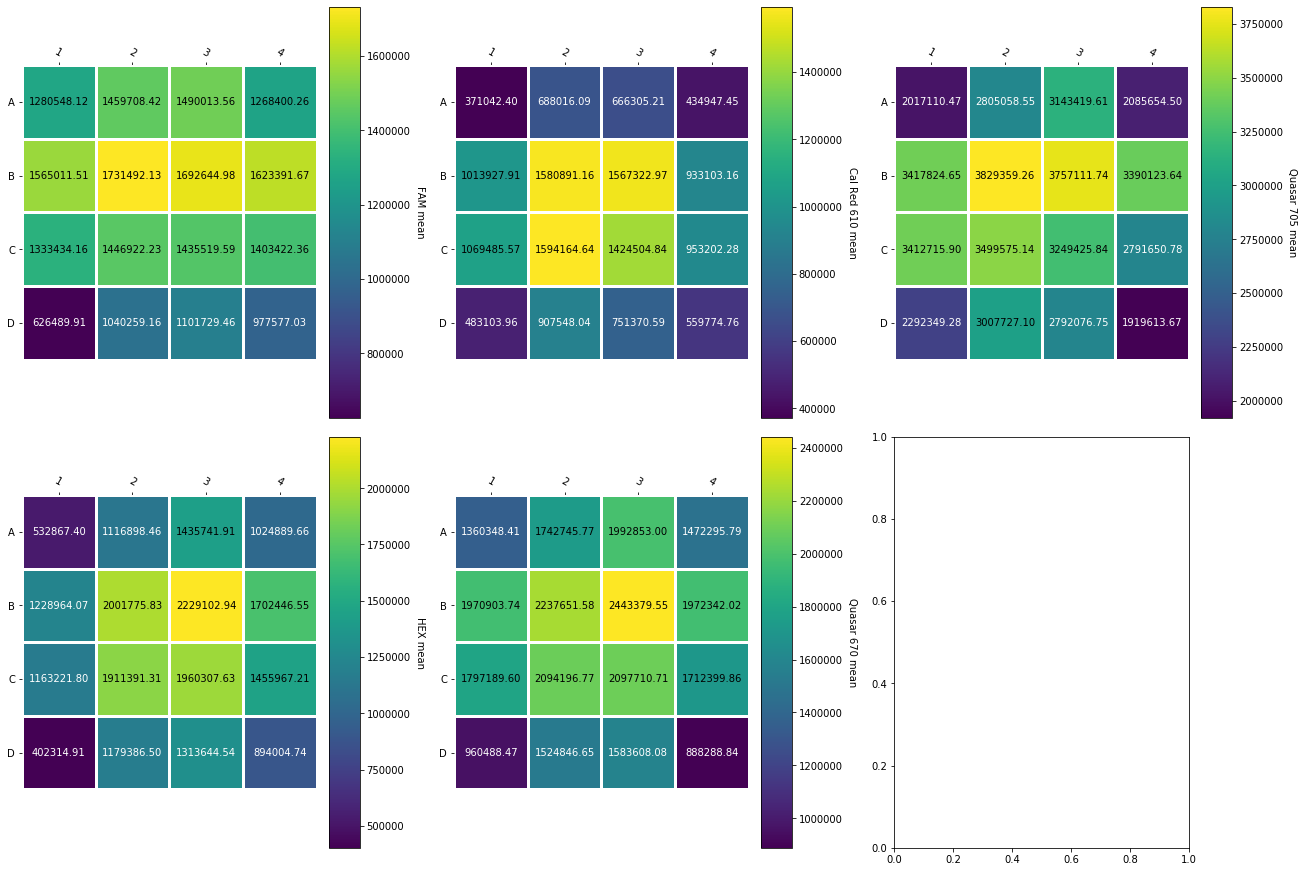

In [50]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)
for ind, dye in enumerate(dye_li):
    i, j = divmod(ind, 2)
    df = f_dic[dye].sort_index().dropna(axis=1)
    mean_dic = df.mean()
    table_cell = []
    for r in row_li:
        _li = []
        for c in col_li:
            try:
                _li.append(round(mean_dic[r+str(c)], 2))
            except KeyError:
                _li.append('')
        table_cell.append(_li)
    table_arr = np.array(table_cell)
    im, cbar = heatmap(table_arr, row_li, col_li, ax=ax[j, i],
                       cbarlabel=f'{dye} mean')
    annotate_heatmap(im, textcolors=['white', 'black'])
plt.savefig("mean_by_channel.png")

In [57]:
df.divide(df.mean(axis=1), axis=0).mean()

A1    0.680722
A2    0.946637
A3    1.060825
A4    0.703853
B1    1.153436
B2    1.292320
B3    1.267940
B4    1.144086
C1    1.151711
C2    1.181022
C3    1.096605
C4    0.942113
D1    0.773612
D2    1.015037
D3    0.942261
D4    0.647820
dtype: float64

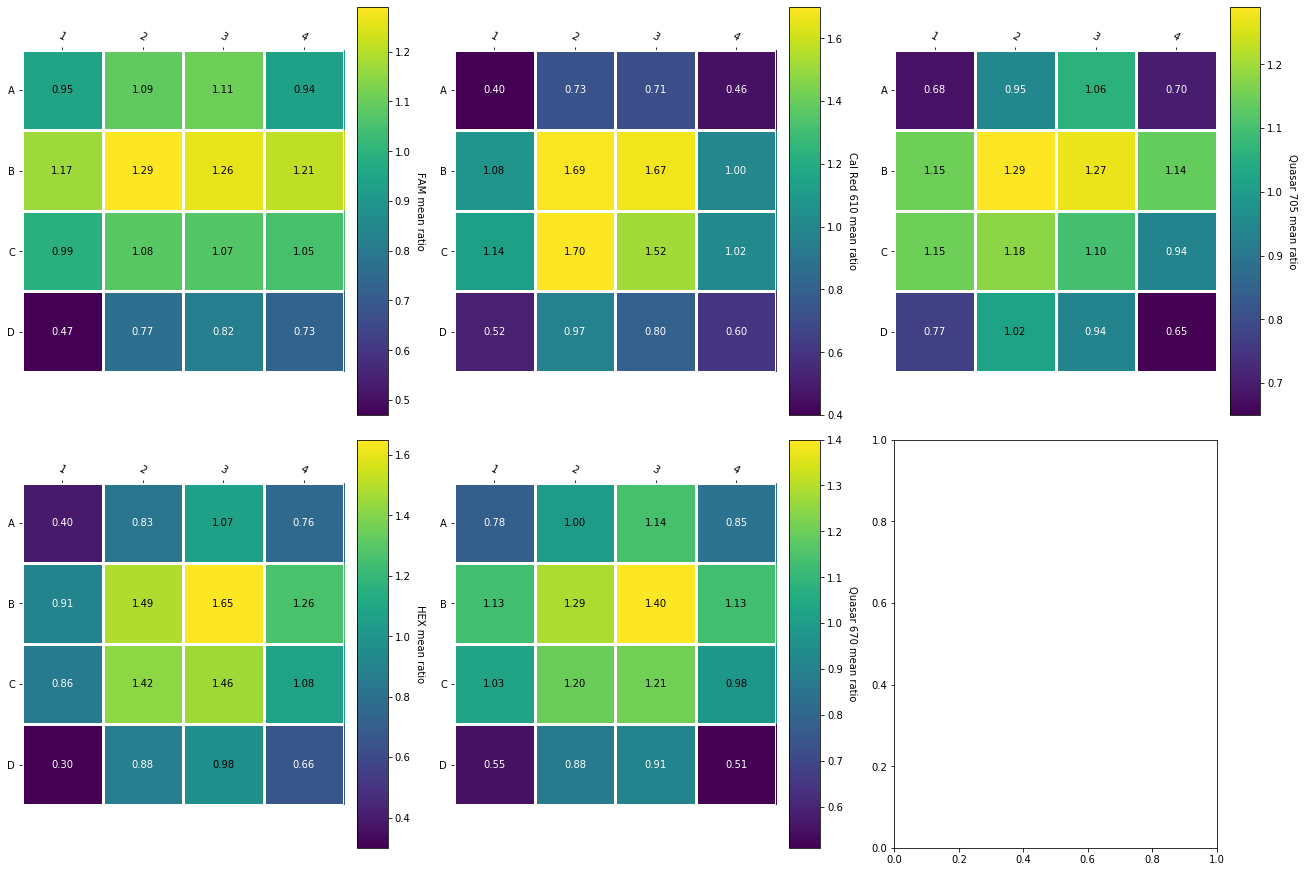

In [59]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)
for ind, dye in enumerate(dye_li):
    i, j = divmod(ind, 2)
    df = f_dic[dye].sort_index().dropna(axis=1)
    mean_dic = df.divide(df.mean(axis=1), axis=0).mean()
    table_cell = []
    for r in row_li:
        _li = []
        for c in col_li:
            try:
                _li.append(round(mean_dic[r+str(c)], 2))
            except KeyError:
                _li.append('')
        table_cell.append(_li)
    table_arr = np.array(table_cell)
    im, cbar = heatmap(table_arr, row_li, col_li, ax=ax[j, i],
                       cbarlabel=f'{dye} mean ratio')
    annotate_heatmap(im, textcolors=['white', 'black'])
plt.savefig("mean_ratio_by_channel.png")

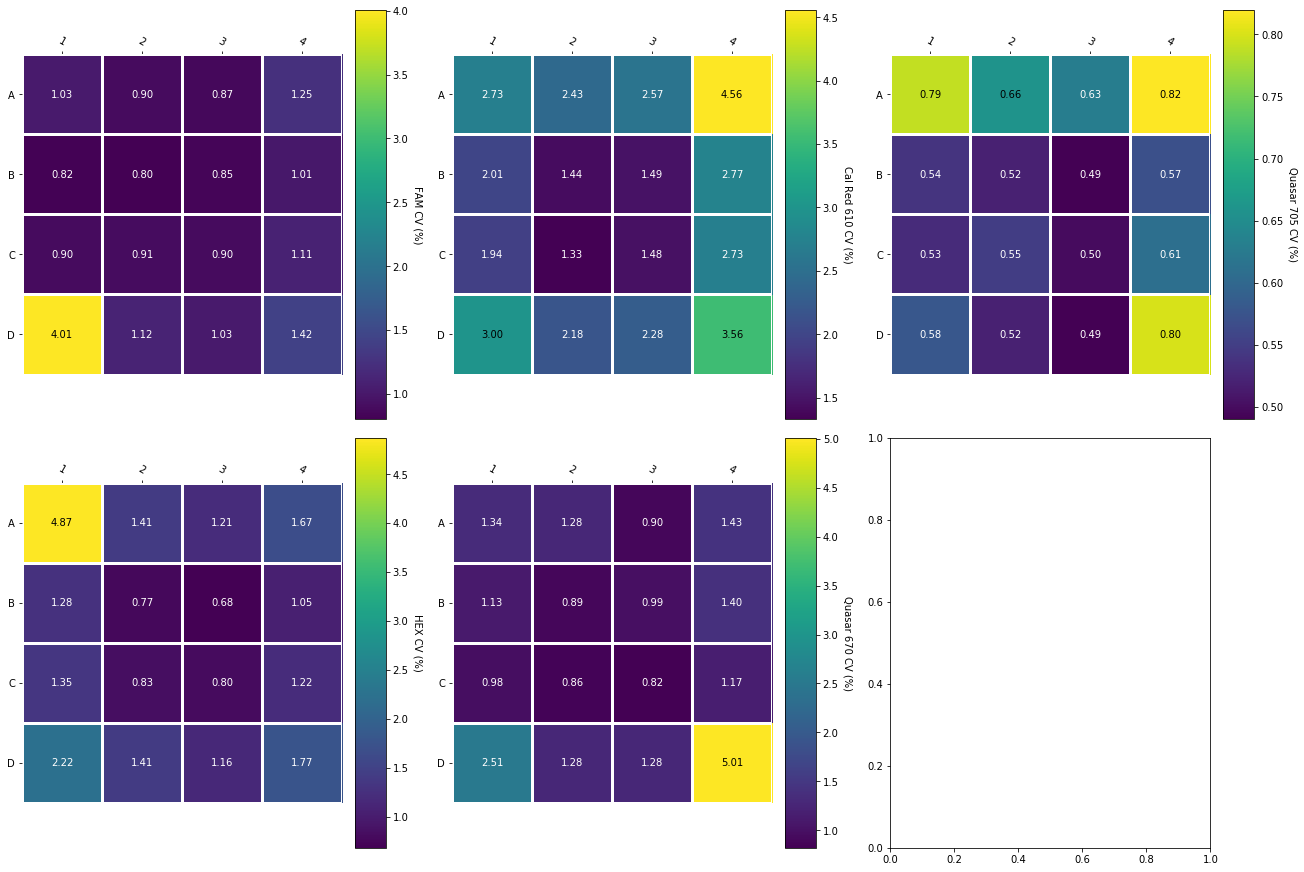

In [63]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)
for ind, dye in enumerate(dye_li):
    i, j = divmod(ind, 2)
    df = f_dic[dye].sort_index().dropna(axis=1)
    mean_dic = df.std()/df.mean()*100
    table_cell = []
    for r in row_li:
        _li = []
        for c in col_li:
            try:
                _li.append(round(mean_dic[r+str(c)], 2))
            except KeyError:
                _li.append('')
        table_cell.append(_li)
    table_arr = np.array(table_cell)
    im, cbar = heatmap(table_arr, row_li, col_li, ax=ax[j, i],
                       cbarlabel=f'{dye} CV (%)')
    annotate_heatmap(im, textcolors=['white', 'black'])
plt.savefig("cv_by_channel.png")